# EquiBoots Bias and Fairness Assessments

## Overview

This notebook demonstrates how to use the EquiBoots package to assess bias and fairness in classification models. Specifically, it walks through a mock-up example using synthetic classification data to:

- Simulate predictions and true labels
- Slice the data by sensitive attributes (e.g., race, gender)
- Evaluate group-based fairness metrics (e.g., TPR disparity, accuracy parity)
- Visualize disparities using violin, box, and other supported plots

The goal is to provide a reproducible, hands-on example of how to leverage `EquiBoots` for auditing model performance across demographic subgroups. This is especially useful for practitioners aiming to build more equitable machine learning systems.

**Note:** Prefer to run this in the cloud? You can open this notebook directly in [Google Colab](https://colab.research.google.com/drive/1HfCFWrBStJds-B5uomwNW6C7_adVRaIE#scrollTo=MY3SJAUFbTgQ).

## Library Imports

In [1]:
import pandas as pd
import numpy as np
import os
import sys

# Add path to import EquiBoots
script_path = os.path.abspath("../py_scripts")
print("Appending path:", script_path)
sys.path.append(script_path)

Appending path: /home/lshpaner/Documents/GitHub_Repositories/equiboots/py_scripts


In [2]:
import equiboots as eqb

## Prepping equiboots

### Classification Mock-Up

The code below generates synthetic classification data and prepares it for group-based fairness analysis using `equiboots`. It includes:

- Simulated predictions and ground truth labels
- Demographic group features (race and sex)
- Construction of a `fairness_df` with group attributes
- Initialization of the `EquiBoots` object for slicing and grouping data

In [3]:
# Generate synthetic test data
y_prob = np.random.rand(1000)
y_pred = y_prob > 0.5
y_true = np.random.randint(0, 2, 1000)

race = (
    np.random.RandomState(3)
    .choice(["white", "black", "asian", "hispanic"], 1000)
    .reshape(-1, 1)
)
sex = np.random.choice(["M", "F"], 1000).reshape(-1, 1)

fairness_df = pd.DataFrame(
    data=np.concatenate((race, sex), axis=1), columns=["race", "sex"]
)

# Initialize and process groups
eq = eqb.EquiBoots(
    y_true=y_true,
    y_prob=y_prob,
    y_pred=y_pred,
    fairness_df=fairness_df,
    fairness_vars=["race", "sex"],
)
eq.grouper(groupings_vars=["race", "sex"])
sliced_data = eq.slicer("race")

Groups created


### Overlay ROC AUC

The cells below generates an overlayed ROC curve visualization for different race groups using the `eq_plot_group_curves` function. It helps assess model performance disparities across demographic subgroups by comparing their respective ROC curves.

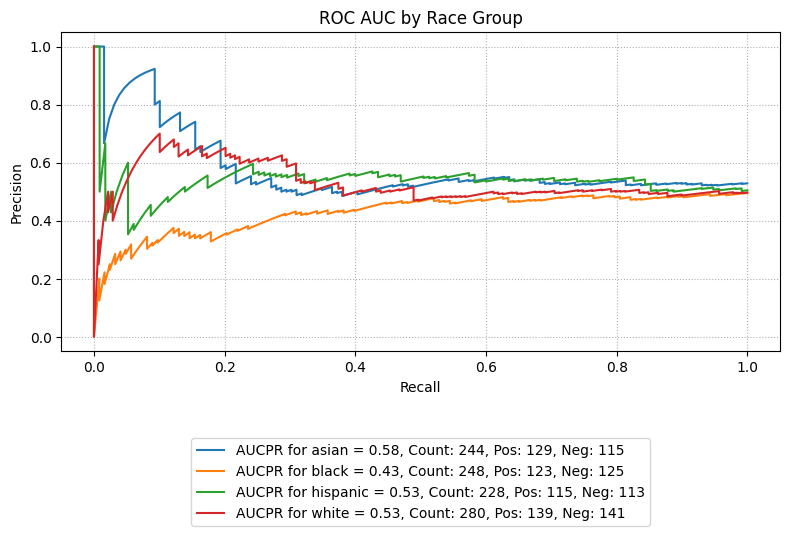

In [4]:
eqb.eq_plot_group_curves(
    sliced_data,
    curve_type="pr",
    # filename="bla",
    title="ROC AUC by Race Group",
    n_bins=10,
    # group="black",
    # exclude_groups=["black", "asian"],
    save_path="./images",
)

### Subplots

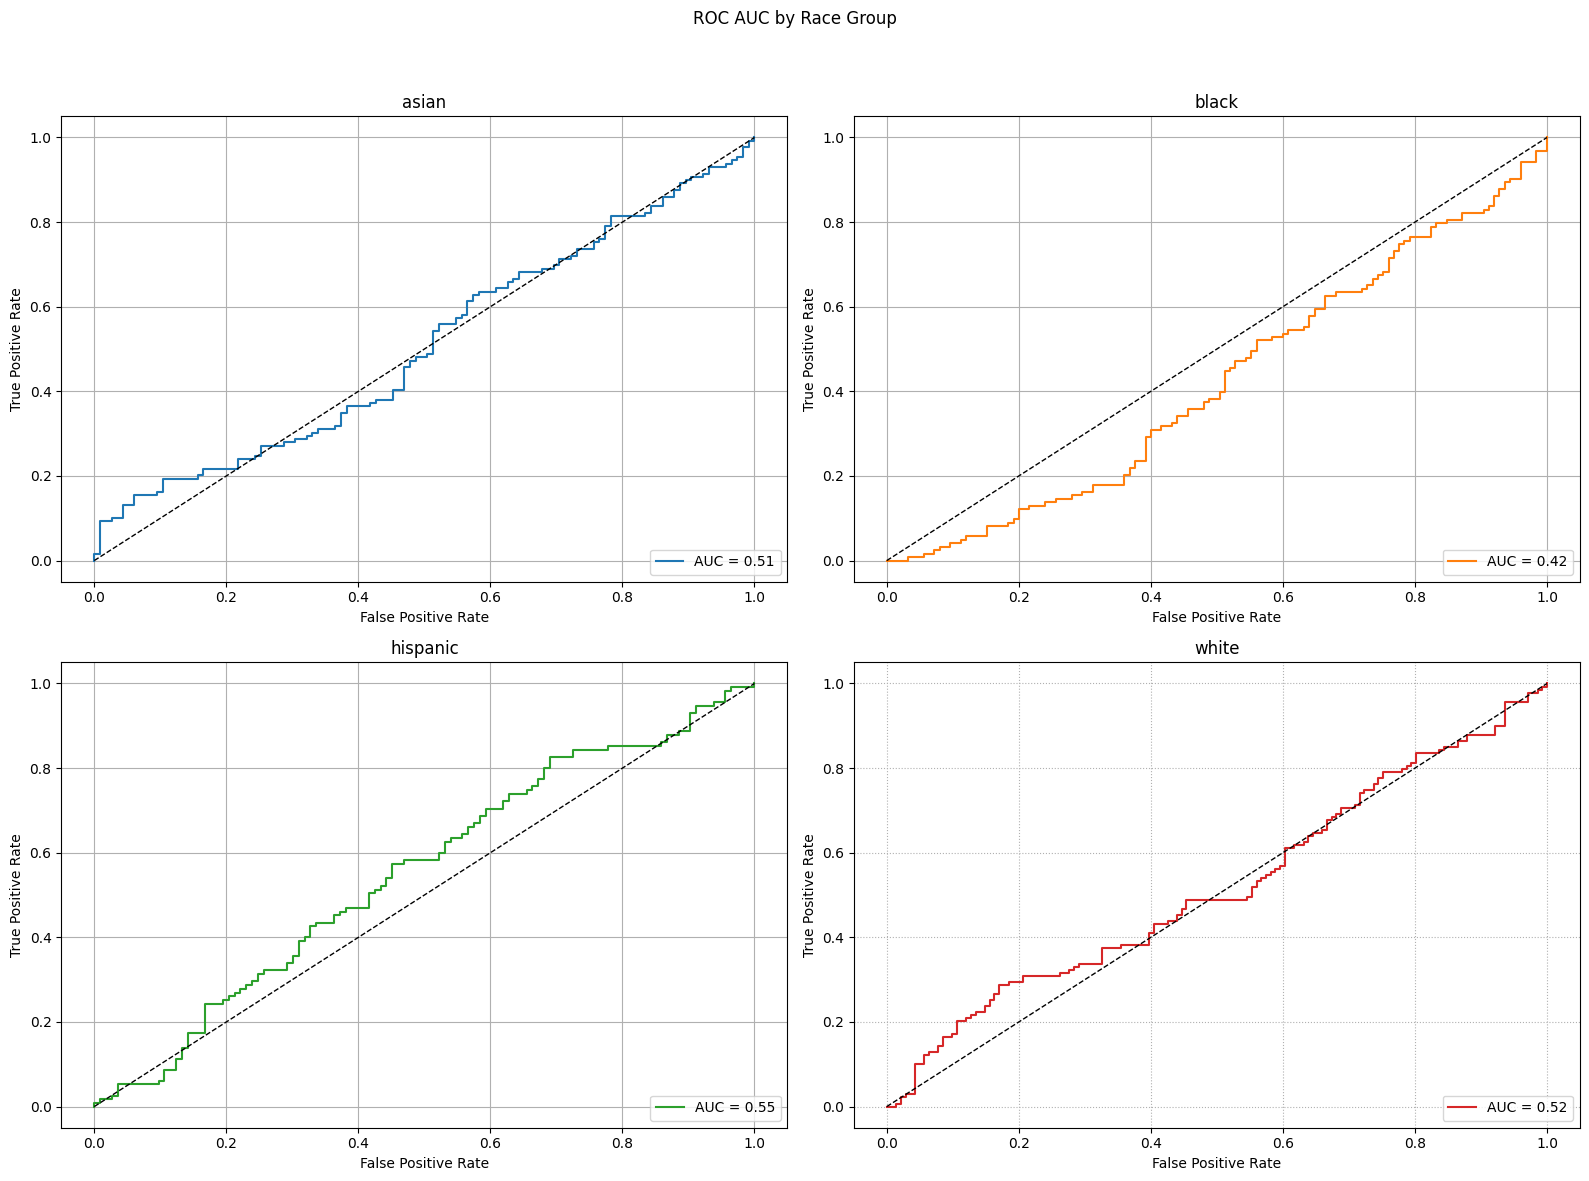

In [5]:
eqb.eq_plot_group_curves(
    sliced_data,
    curve_type="roc",
    title="ROC AUC by Race Group",
    # figsize=(5, 5),
    decimal_places=2,
    subplots=True,
)

### Example of Single Race Group

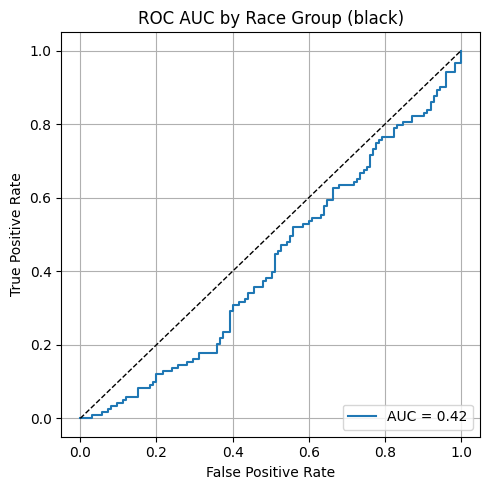

In [6]:
eqb.eq_plot_group_curves(
    sliced_data,
    curve_type="roc",
    title="ROC AUC by Race Group",
    figsize=(5, 5),
    group="black",
    color_by_group=False,
)

## Precision-Recall Curves

### Overlay Precision-Recall Curves

The cells below generates an overlayed ROC curve visualization for different race groups using the `eq_plot_group_curves` function. It helps assess model performance disparities across demographic subgroups by comparing their respective ROC curves.

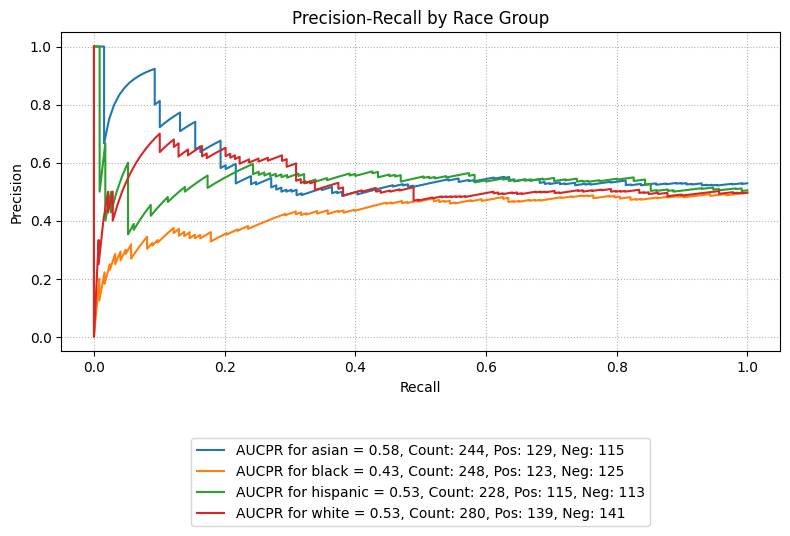

In [7]:
eqb.eq_plot_group_curves(
    sliced_data,
    curve_type="pr",
    title="Precision-Recall by Race Group",
)

### Subplots

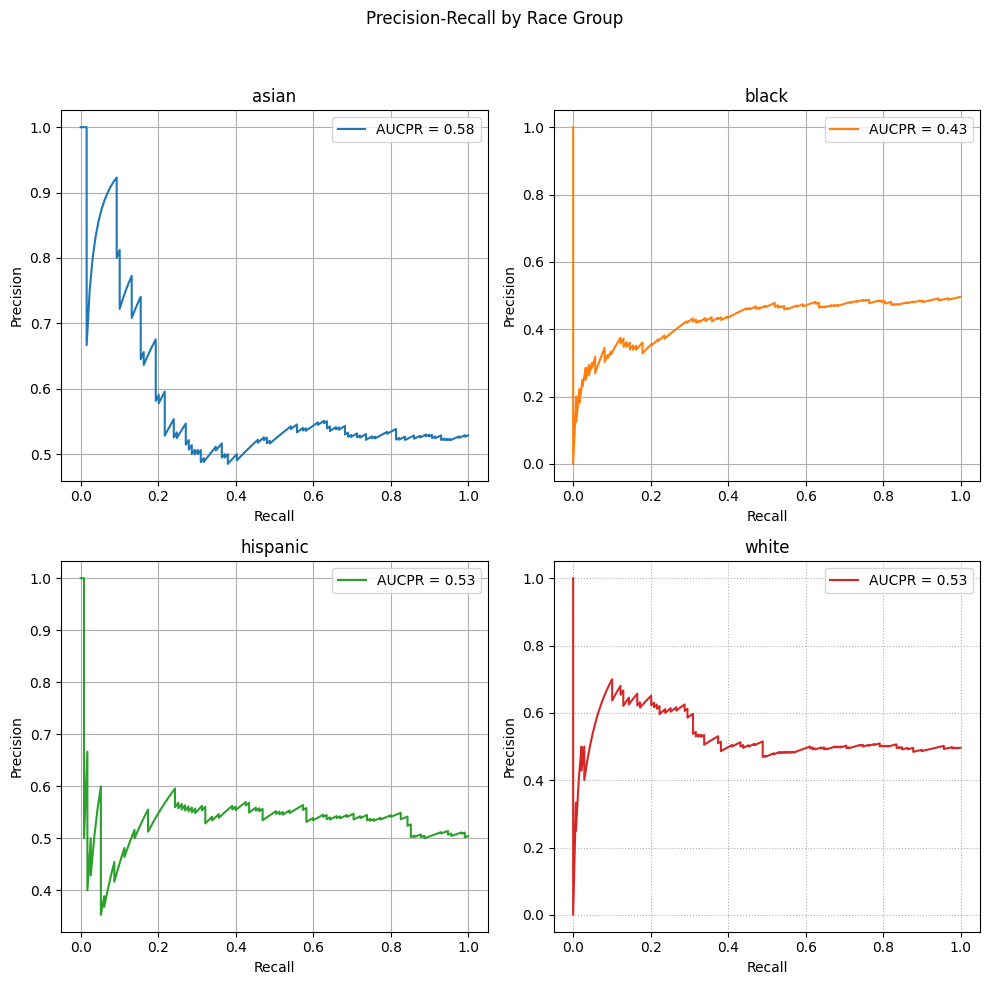

In [8]:
eqb.eq_plot_group_curves(
    sliced_data,
    curve_type="pr",
    title="Precision-Recall by Race Group",
    filename="race",
    figsize=(5, 5),
    decimal_places=2,
    n_cols=2,
    # show_grid=False,
    subplots=True,
)

### Example of Single Race Group

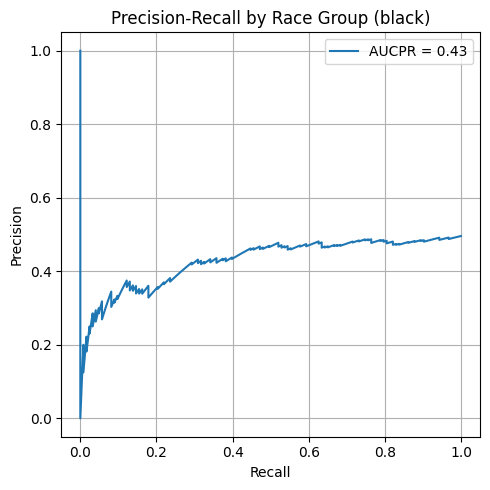

In [9]:
eqb.eq_plot_group_curves(
    sliced_data,
    curve_type="pr",
    title="Precision-Recall by Race Group",
    figsize=(5, 5),
    group="black",
    color_by_group=False,
)

## Calibration Plot

### Overlay


The following cell generates calibration curves for each race group to visualize how well predicted probabilities align with actual outcomes. Using the `eq_plot_group_curves` function in overlay mode. This is a useful diagnostic for evaluating model reliability and potential miscalibration across demographic subgroups.

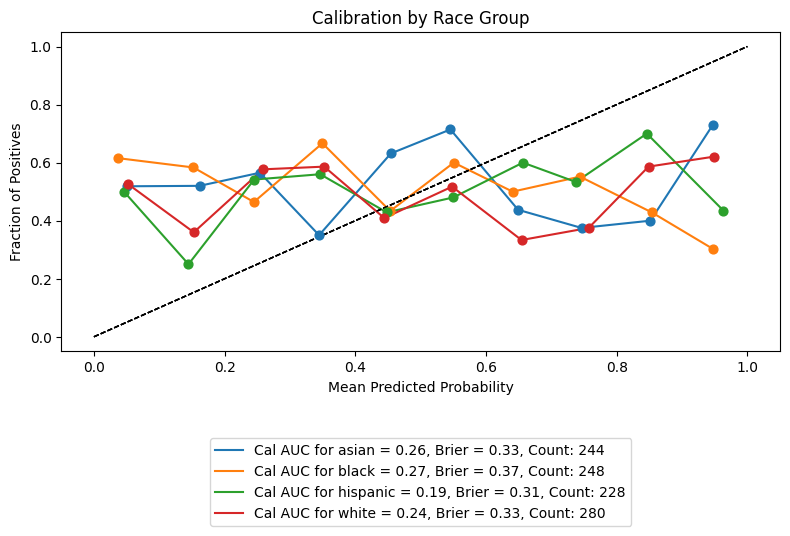

In [10]:
eqb.eq_plot_group_curves(
    sliced_data,
    curve_type="calibration",
    title="Calibration by Race Group",
    n_bins=10,
    show_grid=False,
    # plot_hist=True,
    # subplots=True,
    # exclude_groups="white",
)

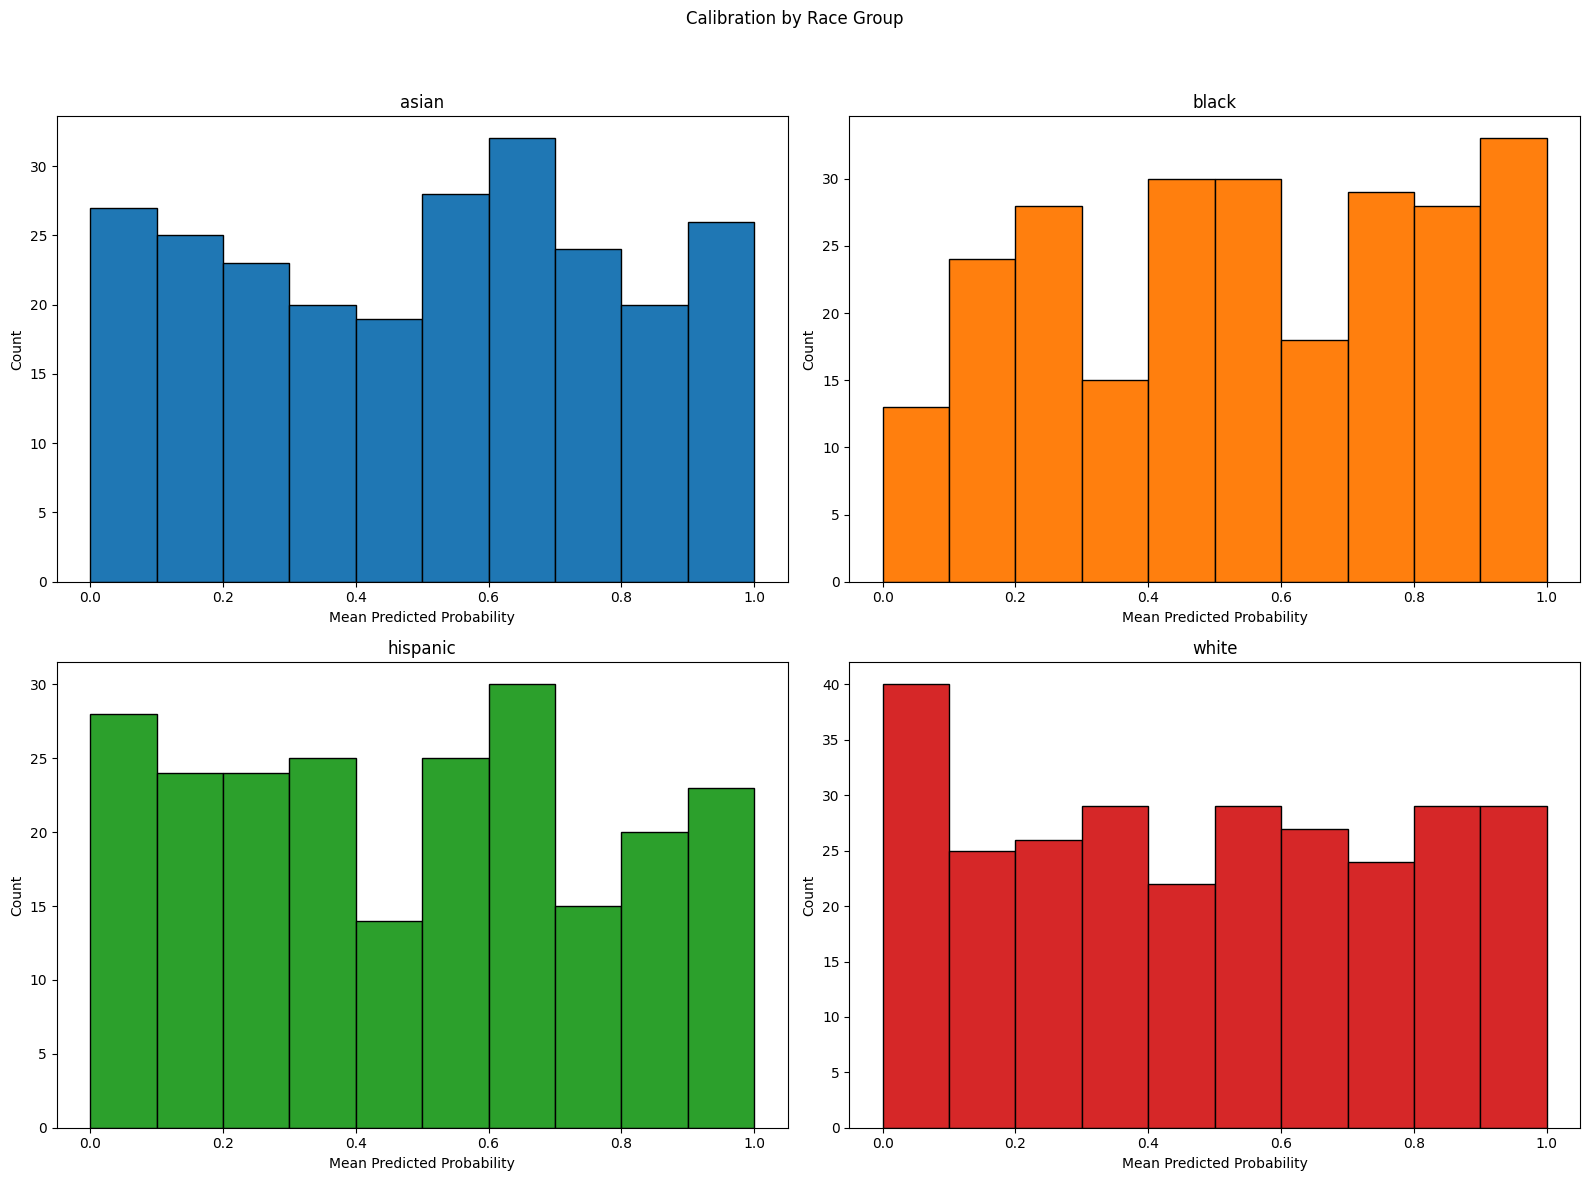

In [11]:
eqb.eq_plot_group_curves(
    sliced_data,
    curve_type="calibration",
    title="Calibration by Race Group",
    n_bins=10,
    show_grid=False,
    plot_hist=True,
    # subplots=True,
    # exclude_groups="white",
)

### Subplots

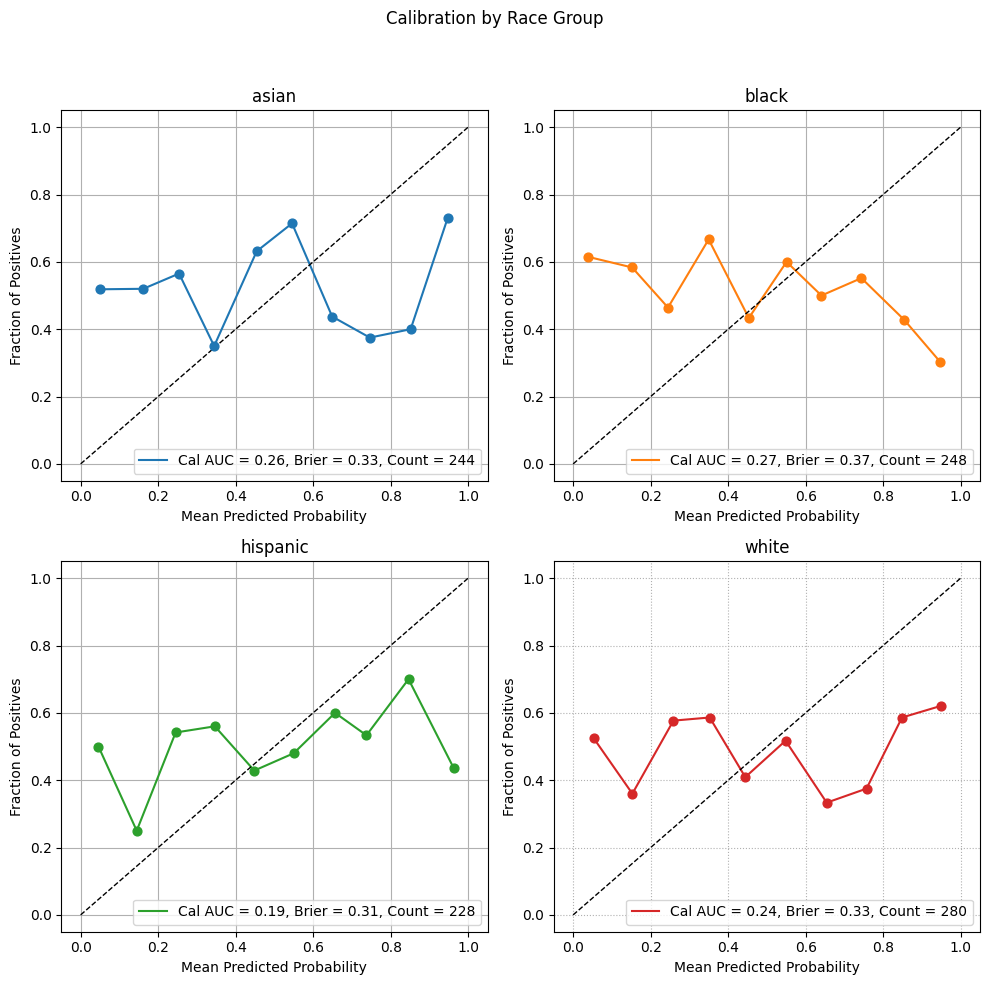

In [12]:
eqb.eq_plot_group_curves(
    sliced_data,
    curve_type="calibration",
    title="Calibration by Race Group",
    figsize=(5, 5),
    decimal_places=2,
    subplots=True,
)

### Example of Single Race Group

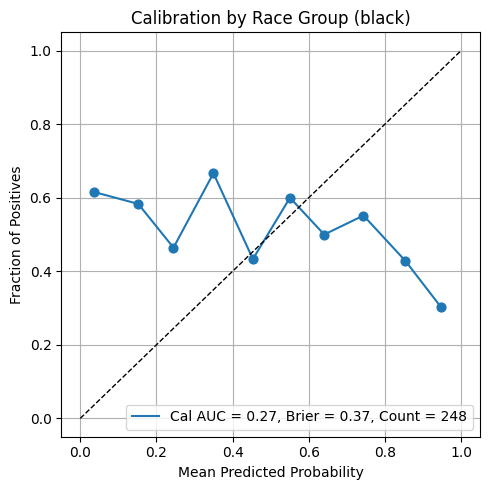

In [13]:
eqb.eq_plot_group_curves(
    sliced_data,
    curve_type="calibration",
    title="Calibration by Race Group",
    figsize=(5, 5),
    group="black",
    color_by_group=False,
)

## Locally Weighted Scatterplot Smoothing (LOWESS) Calibration Curve

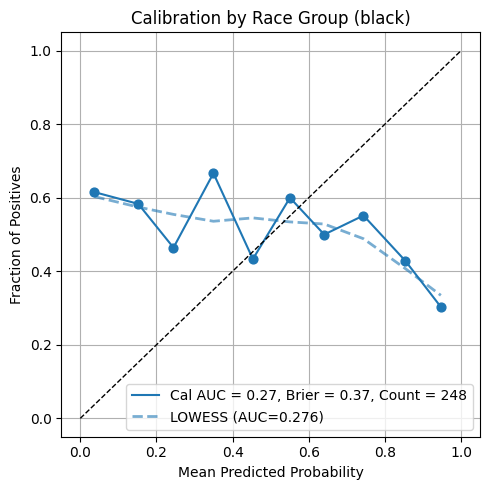

In [14]:
eqb.eq_plot_group_curves(
    sliced_data,
    curve_type="calibration",
    title="Calibration by Race Group",
    figsize=(5, 5),
    group="black",
    lowess=0.6,
    lowess_kwargs={"linestyle": "--", "linewidth": 2, "alpha": 0.6},
    color_by_group=False,
)

## Disparities and Point Estimate Graphs

This section sets up the `EquiBoots` class to compute fairness disparities across race and sex groups using both bootstrapped and non-bootstrapped strategies. Key elements include:

- Initialization of the `EquiBoots` object with bootstrapping enabled (`bootstrap_flag=True`)
- Seeding for reproducibility across 10 boot iterations
- Grouping and slicing by demographic variables
- Metric computation and disparity calculation per group (e.g., race)
- Final output prepared in a long-form DataFrame for visualization

### Disparity (Bootstrapped)

In [15]:
eq2 = eqb.EquiBoots(
    y_true=y_true,
    y_prob=y_prob,
    y_pred=y_pred,
    fairness_df=fairness_df,
    fairness_vars=["race", "sex"],
    reference_groups=["white", "M"],
    task="binary_classification",
    bootstrap_flag=True,
    num_bootstraps=10,
    boot_sample_size=100,
    balanced=False,  # False is stratified, True is balanced
    # stratify_by_outcome=True,
)

# Set seeds
int_list = np.linspace(0, 100, num=10, dtype=int).tolist()
eq2.set_fix_seeds(int_list)
print("seeds", eq2.seeds)

eq2.grouper(groupings_vars=["race", "sex"])

boots_race_data = eq2.slicer("race")
race_metrics = eq2.get_metrics(boots_race_data)
dispa = eq2.calculate_disparities(race_metrics, "race")


boots_sex_data = eq2.slicer("sex")
sex_metrics = eq2.get_metrics(boots_sex_data)

seeds [0, 11, 22, 33, 44, 55, 66, 77, 88, 100]


Bootstrapping iterations: 100%|██████████| 10/10 [00:00<00:00, 606.12it/s]


Groups created
Calculating metrics for each bootstrap:


100%|██████████| 10/10 [00:00<00:00, 82.74it/s]


Calculating metrics for each bootstrap:


100%|██████████| 10/10 [00:00<00:00, 168.52it/s]


### Bootstrapped Disparities (and General Metrics (Non-Disparity)) (Pass/Fail)

The following violinplots show the disparity metrics within threshold for what they are. In the subsequent cell, we will show them for each group as pass or fail. Below we define new variables using the EquiBoots class to calculate disparities
for race and sex groups such that they can be used in the point estimates plot.

#### Bootstrapped Disparities (Pass/Fail)

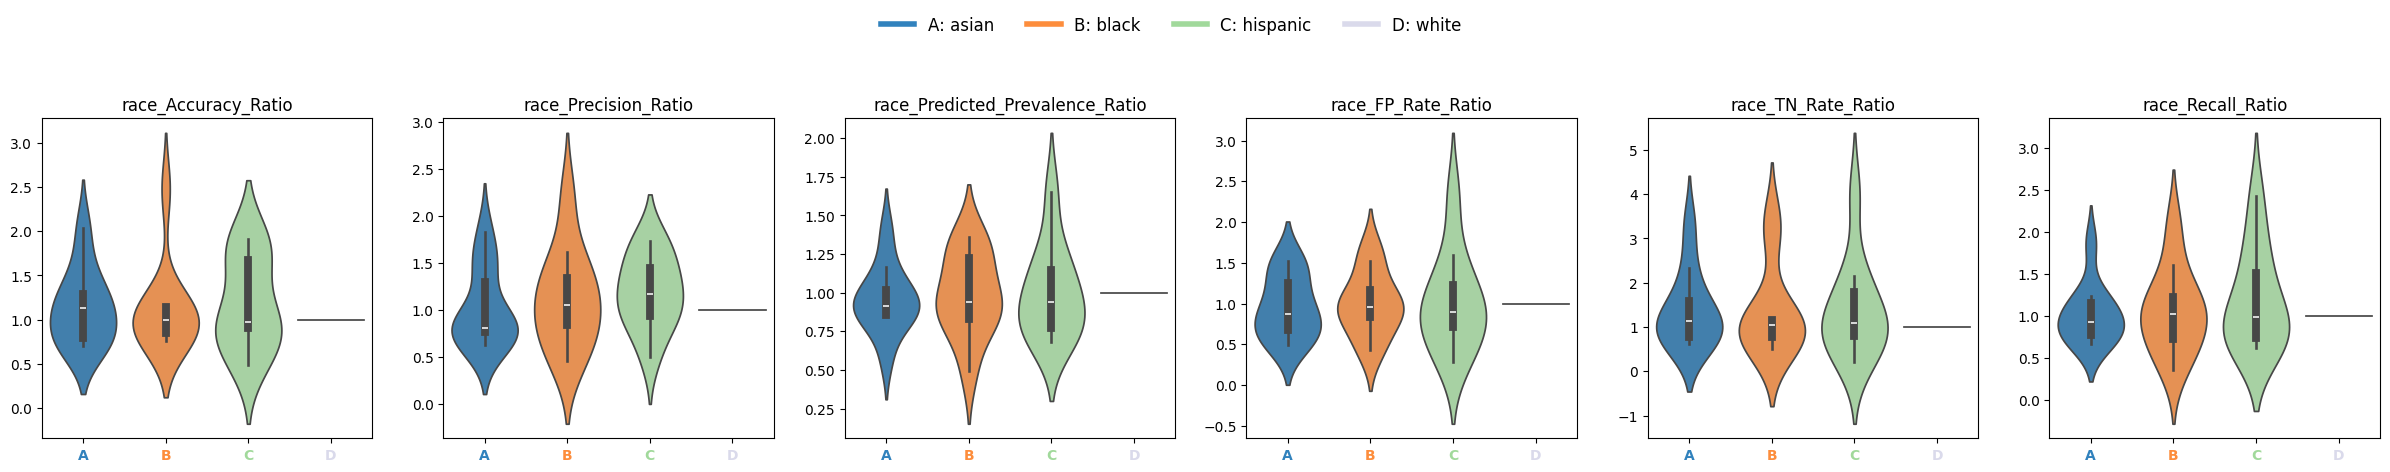

In [16]:
eqb.eq_group_metrics_plot(
    group_metrics=dispa,
    metric_cols=[
        "Accuracy_Ratio",
        "Precision_Ratio",
        "Predicted_Prevalence_Ratio",
        "FP_Rate_Ratio",
        "TN_Rate_Ratio",
        "Recall_Ratio",
    ],
    name="race",
    categories="all",
    # figsize=(24, 4),
    plot_type="violinplot",
    color_by_group=True,
    show_grid=False,
    strict_layout=True,
    save_path="./images",
    # max_cols=3,
    # show_pass_fail=True,
    # y_lim=(-2, 4),
    leg_cols=7,
    plot_thresholds=[0.9, 1.2],
)

In [17]:
race_metrics

[{'asian': {'Accuracy': 0.625,
   'Precision': 0.7142857142857143,
   'Recall': 0.6666666666666666,
   'F1 Score': 0.6896551724137931,
   'Specificity': 0.5555555555555556,
   'TP Rate': 0.6666666666666666,
   'FP Rate': 0.4444444444444444,
   'FN Rate': 0.3333333333333333,
   'TN Rate': 0.5555555555555556,
   'TP': 10,
   'FP': 4,
   'FN': 5,
   'TN': 5,
   'Prevalence': 0.625,
   'Predicted Prevalence': 0.5833333333333334,
   'ROC AUC': 0.5333333333333334,
   'Average Precision Score': 0.6924675324675325,
   'Log Loss': 0.9284478024498958,
   'Brier Score': 0.30309902677515504,
   'Calibration AUC': 0.3638883870664715},
  'white': {'Accuracy': 0.5357142857142857,
   'Precision': 0.5,
   'Recall': 0.5384615384615384,
   'F1 Score': 0.5185185185185185,
   'Specificity': 0.5333333333333333,
   'TP Rate': 0.5384615384615384,
   'FP Rate': 0.4666666666666667,
   'FN Rate': 0.46153846153846156,
   'TN Rate': 0.5333333333333333,
   'TP': 7,
   'FP': 7,
   'FN': 6,
   'TN': 8,
   'Prevalence

Below we define new variables using the EquiBoots class to calculate disparities and non-disparity metrics for race and sex groups such that they can be used in the point estimates plot.

In [18]:
eq3 = eqb.EquiBoots(
    y_true=y_true,
    y_prob=y_prob,
    y_pred=y_pred,
    fairness_df=fairness_df,
    fairness_vars=["race", "sex"],
    reference_groups=["white", "M"],
    task="binary_classification",
    bootstrap_flag=False,
)

eq3.grouper(groupings_vars=["race", "sex"])
sliced_data = eq3.slicer("race")

data_race = eq3.slicer("race")
data_sex = eq3.slicer("sex")

race_metrics_3 = eq3.get_metrics(data_race)
sex_metrics_3 = eq3.get_metrics(data_sex)

dispa_race = eq3.calculate_disparities(race_metrics_3, "race")
dispa_sex = eq3.calculate_disparities(sex_metrics_3, "sex")

Groups created


### Point Estimate Disparities and General (Non-Disparity) Metrics (Pass/Fail)

The following violinplots show the disparity metrics within threshold for what they are. In the ensuing cell, we will show them for each group as pass or fail.

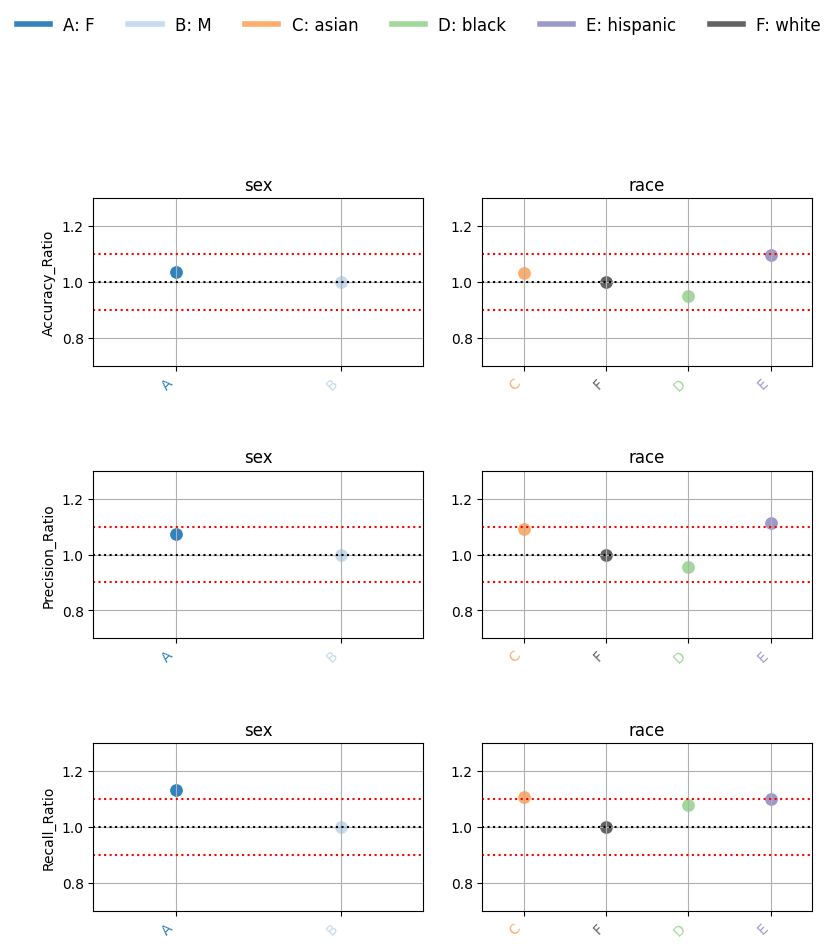

In [19]:
# Run with custom y_lim and adjusted thresholds
eqb.eq_group_metrics_point_plot(
    group_metrics=[dispa_sex, dispa_race],
    metric_cols=[
        "Accuracy_Ratio",
        "Precision_Ratio",
        "Recall_Ratio",
    ],
    category_names=["sex", "race"],
    figsize=(8, 8),
    include_legend=True,
    plot_thresholds=(0.9, 1.1),
    # show_pass_fail=True,
    raw_metrics=False,
    show_grid=True,
    # horizontal=True,
    y_lim=(0.7, 1.3),
    leg_cols=6,
    # y_lim=(0, 0.9),
)

### Point Estimates

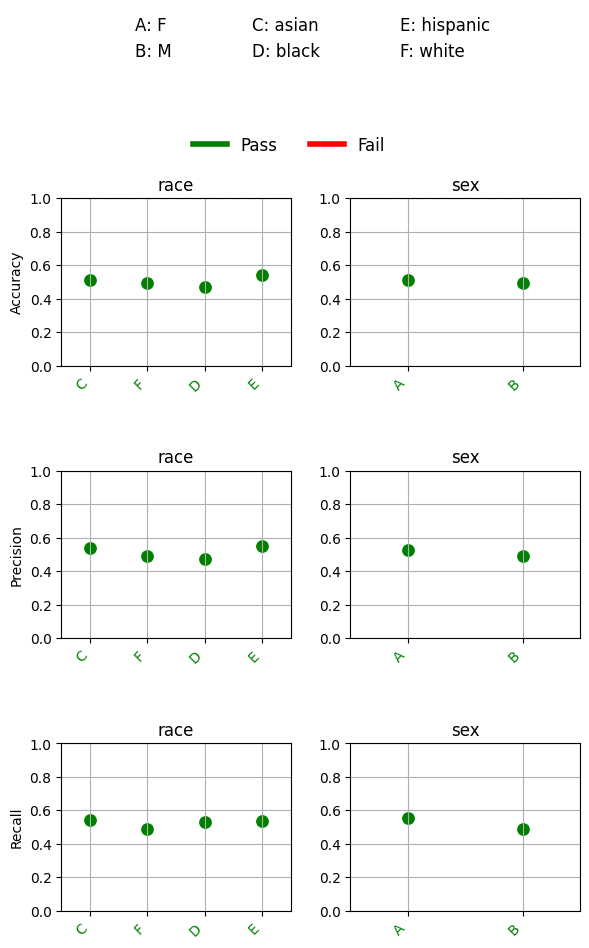

In [20]:
# Run with custom y_lim and adjusted thresholds
eqb.eq_group_metrics_point_plot(
    group_metrics=[race_metrics_3, sex_metrics_3],
    metric_cols=[
        "Accuracy",
        "Precision",
        "Recall",
    ],
    category_names=["race", "sex"],
    figsize=(6, 8),
    include_legend=True,
    plot_thresholds=(0.9, 1.1),
    show_pass_fail=True,
    raw_metrics=True,
    show_grid=True,
    y_lim=(0, 1),
)

In [21]:
test_config = {
    "test_type": "chi_square",
    "alpha": 0.05,
    "adjust_method": "bonferroni",
    "confidence_level": 0.95,
    "classification_task": "binary_classification",
}
stat_test_results = eq.analyze_statistical_significance(
    race_metrics_3, "race", test_config
)

In [22]:
stat_test_results

{'omnibus': StatTestResult(statistic=6.159503553864871, p_value=0.7238544538985582, is_significant=False, test_name='Chi-Square Test', critical_value=None, effect_size=None, confidence_interval=None)}

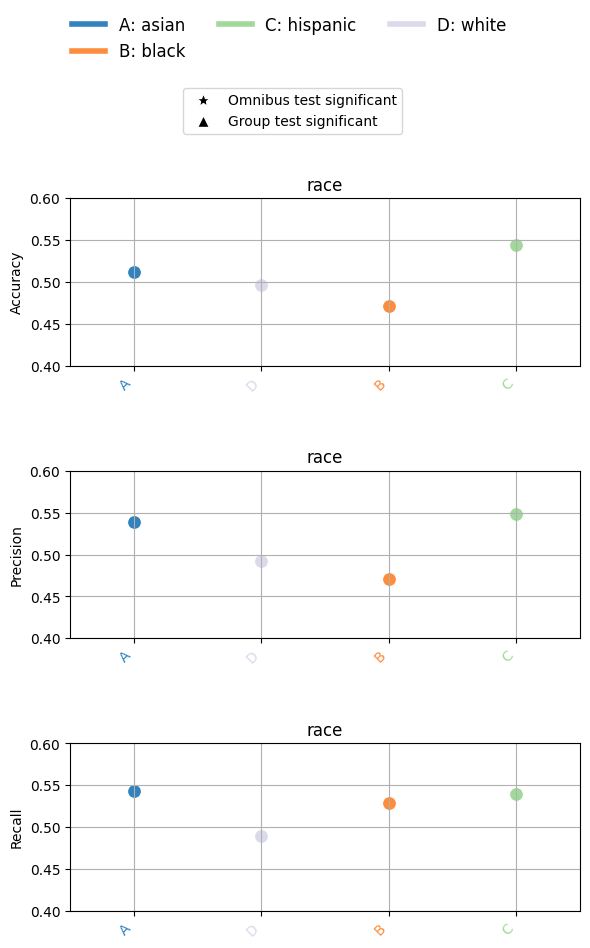

In [23]:
# Run with custom y_lim and adjusted thresholds
eqb.eq_group_metrics_point_plot(
    group_metrics=[race_metrics_3],
    metric_cols=[
        "Accuracy",
        "Precision",
        "Recall",
    ],
    category_names=["race"],
    figsize=(6, 8),
    include_legend=True,
    plot_thresholds=(0.9, 1.1),
    raw_metrics=True,
    show_grid=True,
    show_reference=True,
    statistical_tests=stat_test_results,
    y_lims={(0, 0): (0.4, 0.6), (1, 0): (0.4, 0.6), (2, 0): (0.4, 0.6)},
)

### Forest Plots - Point Estimates

In [24]:
stat_test_results["omnibus"].is_significant = True

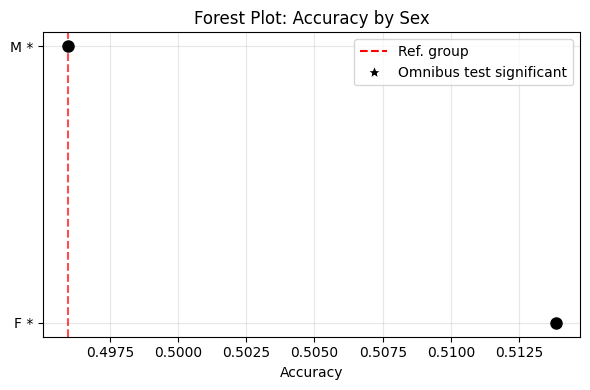

In [25]:
eqb.eq_plot_metrics_forest(
    group_metrics=sex_metrics_3,
    metric_name="Accuracy",
    reference_group="M",
    title="Forest Plot: Accuracy by Sex",
    statistical_tests=stat_test_results,
)

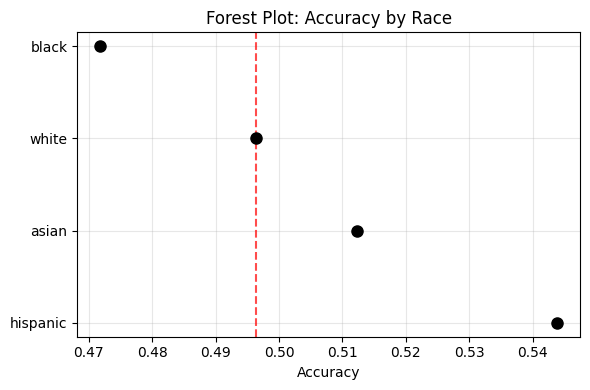

In [26]:
eqb.eq_plot_metrics_forest(
    group_metrics=race_metrics_3,
    metric_name="Accuracy",
    reference_group="white",
    title="Forest Plot: Accuracy by Race",
)

### Forest Plots with Additional Options (Custom x_lim and Alphabetical Sorting)

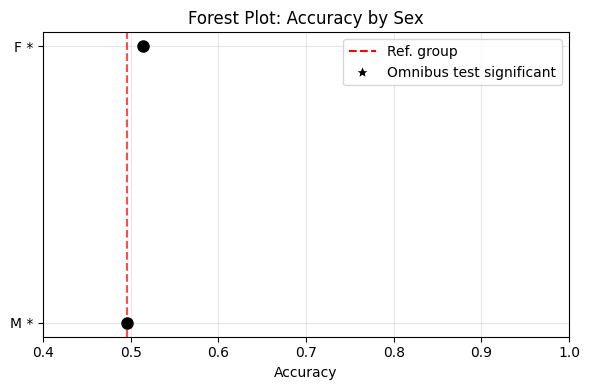

In [49]:
eqb.eq_plot_metrics_forest(
    group_metrics=sex_metrics_3,
    metric_name="Accuracy",
    reference_group="M",
    title="Forest Plot: Accuracy by Sex",
    statistical_tests=stat_test_results,
    x_lim=(0.4, 1),
    sort_alphabetically=True,
)

## Group Metrics Table

The table below aggregates group-level disparity metrics derived from the synthetic classification data. Each row corresponds to a different group or subgroup comparison, and each column represents the ratio of a common performance metric (e.g., accuracy, recall, specificity) between groups.

These ratios help quantify disparities; values close to 1.0 indicate parity, while deviations suggest potential fairness concerns. This summary provides a foundation for further visual or statistical analysis.

> Note: While this example uses disparity metrics (e.g., `Accuracy_Ratio`, `Recall_Ratio`) generated via `calculate_disparities()`, the same structure works with standard group-level metrics as well. If you're using `get_metrics()` instead, simply pass the non-ratio metric columns (e.g., "`Accuracy`", "`Recall`") via the metrics_cols argument to generate a comparable summary table.


In [27]:
disa_metrics_df = eqb.metrics_dataframe(metrics_data=dispa)
disa_metrics_df

,Accuracy_Ratio,Precision_Ratio,Recall_Ratio,F1_Score_Ratio,Specificity_Ratio,TP_Rate_Ratio,FP_Rate_Ratio,FN_Rate_Ratio,TN_Rate_Ratio,Prevalence_Ratio,Predicted_Prevalence_Ratio,ROC_AUC_Ratio,Average_Precision_Score_Ratio,Log_Loss_Ratio,Brier_Score_Ratio,Calibration_AUC_Ratio,attribute_value
0,1.166667,1.428571,1.238095,1.330049,1.041667,1.238095,0.952381,0.722222,1.041667,1.346154,1.166667,0.859504,1.022823,1.139945,1.072866,1.224513,asian
1,1.166667,0.800000,0.872727,0.840000,1.292308,0.872727,0.791209,1.057851,1.292308,0.802083,0.875000,1.167528,0.761381,0.649292,0.805157,1.067207,asian
2,0.823529,0.909091,0.717949,0.805556,0.954545,0.717949,1.060606,1.507692,0.954545,1.083333,0.855556,0.659551,0.838287,1.371223,1.314171,1.412991,asian
3,1.088889,0.818182,0.981818,0.900000,1.230769,0.981818,0.769231,1.022727,1.230769,0.712963,0.855556,1.244273,0.892474,0.649674,0.839880,0.851451,asian
4,2.041667,1.828571,1.866667,1.846154,2.333333,1.866667,0.636364,0.518519,2.333333,1.000000,1.020833,1.418623,1.132860,0.652576,0.664945,0.822062,asian
5,1.333333,0.750000,0.875000,0.803571,1.685185,0.875000,0.486111,1.166667,1.685185,0.500000,0.583333,0.907407,0.419557,0.771536,0.826540,1.197342,asian
6,0.700000,0.777778,0.666667,0.724638,0.726496,0.666667,1.307692,1.400000,0.726496,1.166667,1.000000,0.818959,0.961230,1.050883,1.101335,1.929081,asian
7,1.590909,1.507937,1.185185,1.340996,3.333333,1.185185,0.533333,0.761905,3.333333,1.093750,0.859649,1.155556,1.054640,0.972169,0.891343,0.955079,asian
8,0.717949,0.763889,0.735294,0.745192,0.685714,0.735294,1.523810,1.176471,0.685714,0.991667,0.954545,0.916730,0.887721,1.179614,1.087640,1.629524,asian
9,0.777778,0.625000,1.050000,0.818182,0.625000,1.050000,1.500000,0.980000,0.625000,0.833333,1.400000,0.616667,0.628190,1.039846,1.110834,1.168327,asian


## Find Matching Thresholds for Groups

In [28]:
group_thresholds_race = eqb.find_group_thresholds(
    y_true=y_true,
    y_prob=y_prob,
    reference_group="white",
    group_vec=fairness_df["race"],
    ref_metrics=None,
    threshold_range=(0.1, 0.9),
    n_steps=100,
    default_threshold=0.5,
)

### Apply Grouped Thresholds to Make New Predictions

In [29]:
# Extract race labels for each instance in the dataset
race_labels = fairness_df["race"].values

# Get new predictions using group-specific thresholds
y_pred_grouped_thresh = eqb.grouped_threshold_predict(
    y_prob,
    race_labels,
    group_thresholds_race,
)

# Save new predictions in the fairness DataFrame
fairness_df["y_pred_grouped_thresh"] = y_pred_grouped_thresh

### Create New EquiBoots Object for Adjusted Predictions

In [30]:
# Add true labels and predicted probabilities
fairness_df["y_true"] = y_true  # holds the correct answers/actual labels
fairness_df["y_prob"] = y_prob  # model's predicted probabilities

X_test = fairness_df

In [31]:
# Create a new EquiBoots object using the adjusted predictions
eq_adjusted = eqb.EquiBoots(
    y_true=fairness_df["y_true"],  # True labels
    y_prob=fairness_df["y_prob"],  # Predicted probabilities
    y_pred=fairness_df["y_pred_grouped_thresh"],  # Adjusted predictions
    fairness_df=fairness_df,  # Dataset with sensitive attributes
    fairness_vars=["race"],  # Focus fairness analysis on race
)

# Re-group the data by race (prepares for fairness slicing)
eq_adjusted.grouper(groupings_vars=["race"])

Groups created


### Slice and Evaluate New Metrics by Race

In [32]:
# Extract subgroup data by race
sliced_race_data_adjusted = eq_adjusted.slicer("race")

# Compute fairness performance metrics for each racial group using adjusted predictions
race_metrics_adjusted = eq_adjusted.get_metrics(sliced_race_data_adjusted)

### Run Statistical Significance Tests for Adjusted Predictions

In [33]:
# Create adjusted predictions using race-specific thresholds
race_labels = fairness_df["race"].values
y_pred_grouped_thresh = eqb.grouped_threshold_predict(
    y_prob, race_labels, group_thresholds_race
)

# Update fairness_df with adjusted predictions
fairness_df["y_pred_grouped_thresh"] = y_pred_grouped_thresh

# Instantiate new EquiBoots object using thresholded predictions
eq_adjusted = eqb.EquiBoots(
    y_true=fairness_df["y_true"],
    y_prob=fairness_df["y_prob"],
    y_pred=fairness_df["y_pred_grouped_thresh"],
    fairness_df=fairness_df,
    fairness_vars=["race"],
)

# Group by race for adjusted metrics
eq_adjusted.grouper(groupings_vars=["race"])

# Evaluate adjusted metrics by race
sliced_race_data_adjusted = eq_adjusted.slicer("race")
race_metrics_adjusted = eq_adjusted.get_metrics(sliced_race_data_adjusted)

# Run statistical significance tests on adjusted race metrics
test_config = {
    "test_type": "chi_square",
    "alpha": 0.05,
    "adjust_method": "bonferroni",
    "confidence_level": 0.95,
    "classification_task": "binary_classification",
}
stat_test_results_adjusted = eq_adjusted.analyze_statistical_significance(
    race_metrics_adjusted, "race", test_config
)

Groups created


### Combine Adjusted and Original Metrics for Final Plot

In [34]:
# Combine updated race metrics and original sex metrics for a final fairness plot
overall_stat_results_adjusted = {
    "race": stat_test_results_adjusted,  # Adjusted test results for race
}

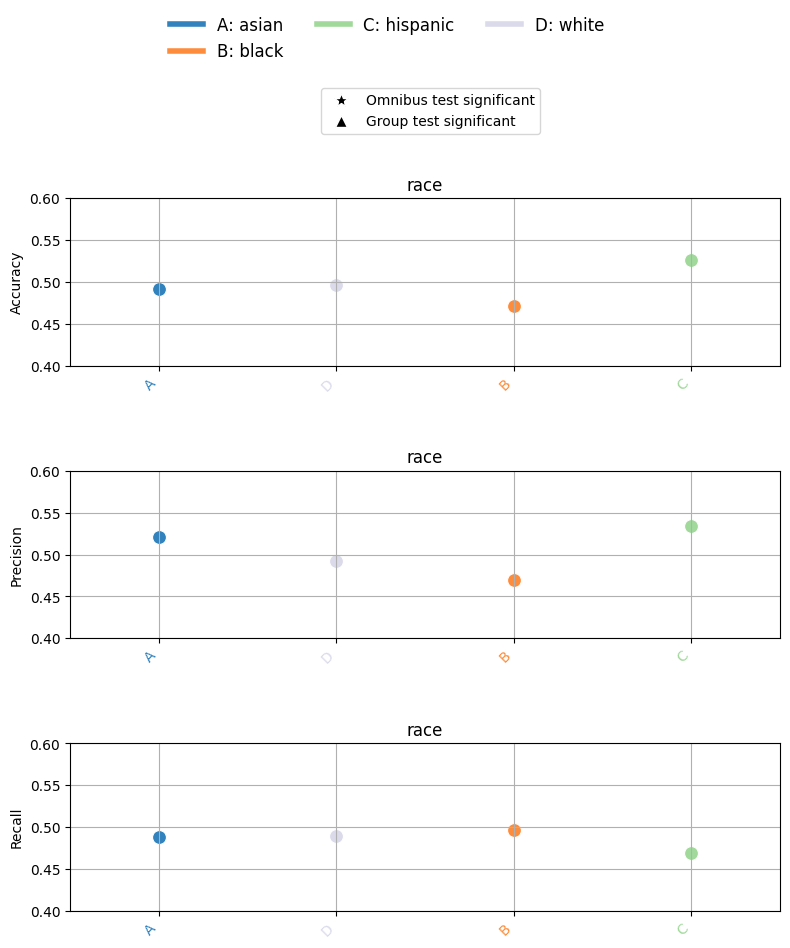

In [35]:
# Plot the group performance metrics for both race (adjusted) and sex (original)
eqb.eq_group_metrics_point_plot(
    group_metrics=[race_metrics_adjusted],  # Grouped metrics to compare
    metric_cols=["Accuracy", "Precision", "Recall"],  # Metrics to plot
    category_names=["race"],  # Categories to compare
    figsize=(8, 8),  # Size of the plot
    include_legend=True,  # Show legend
    plot_thresholds=(0.9, 1.1),  # Highlight near-equality
    raw_metrics=True,  # Use raw (not normalized) values
    show_grid=True,  # Add grid to plot
    y_lim=(0, 1),  # Set y-axis limits
    statistical_tests=overall_stat_results_adjusted,  # Display statistical test results
    y_lims={(0, 0): (0.4, 0.6), (1, 0): (0.4, 0.6), (2, 0): (0.4, 0.6)},
)

## Bootstrapped ROC AUC, Precision-Recall, and Calibration Curves

### ROCAUC Bootstrap

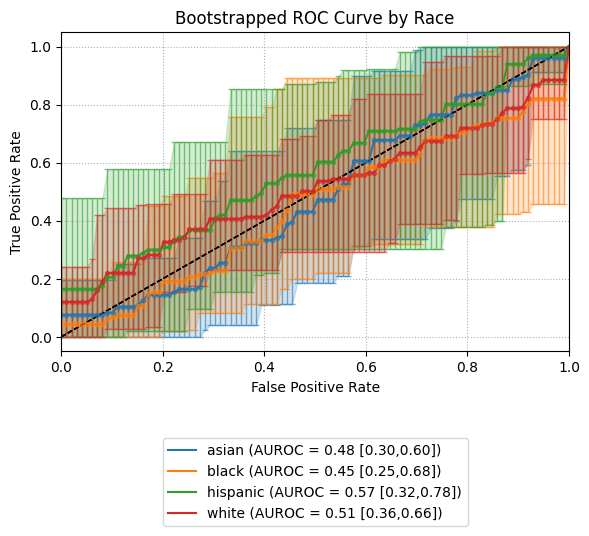

In [36]:
eqb.eq_plot_bootstrapped_group_curves(
    boot_sliced_data=boots_race_data,
    curve_type="roc",
    title="Bootstrapped ROC Curve by Race",
    filename="boot_roc_race",
    save_path="./images",
    # subplots=True,
    bar_every=100,
    dpi=100,
    n_bins=10,
    figsize=(6, 6),
    color_by_group=True,
)

### Precision-Recall Bootstrap

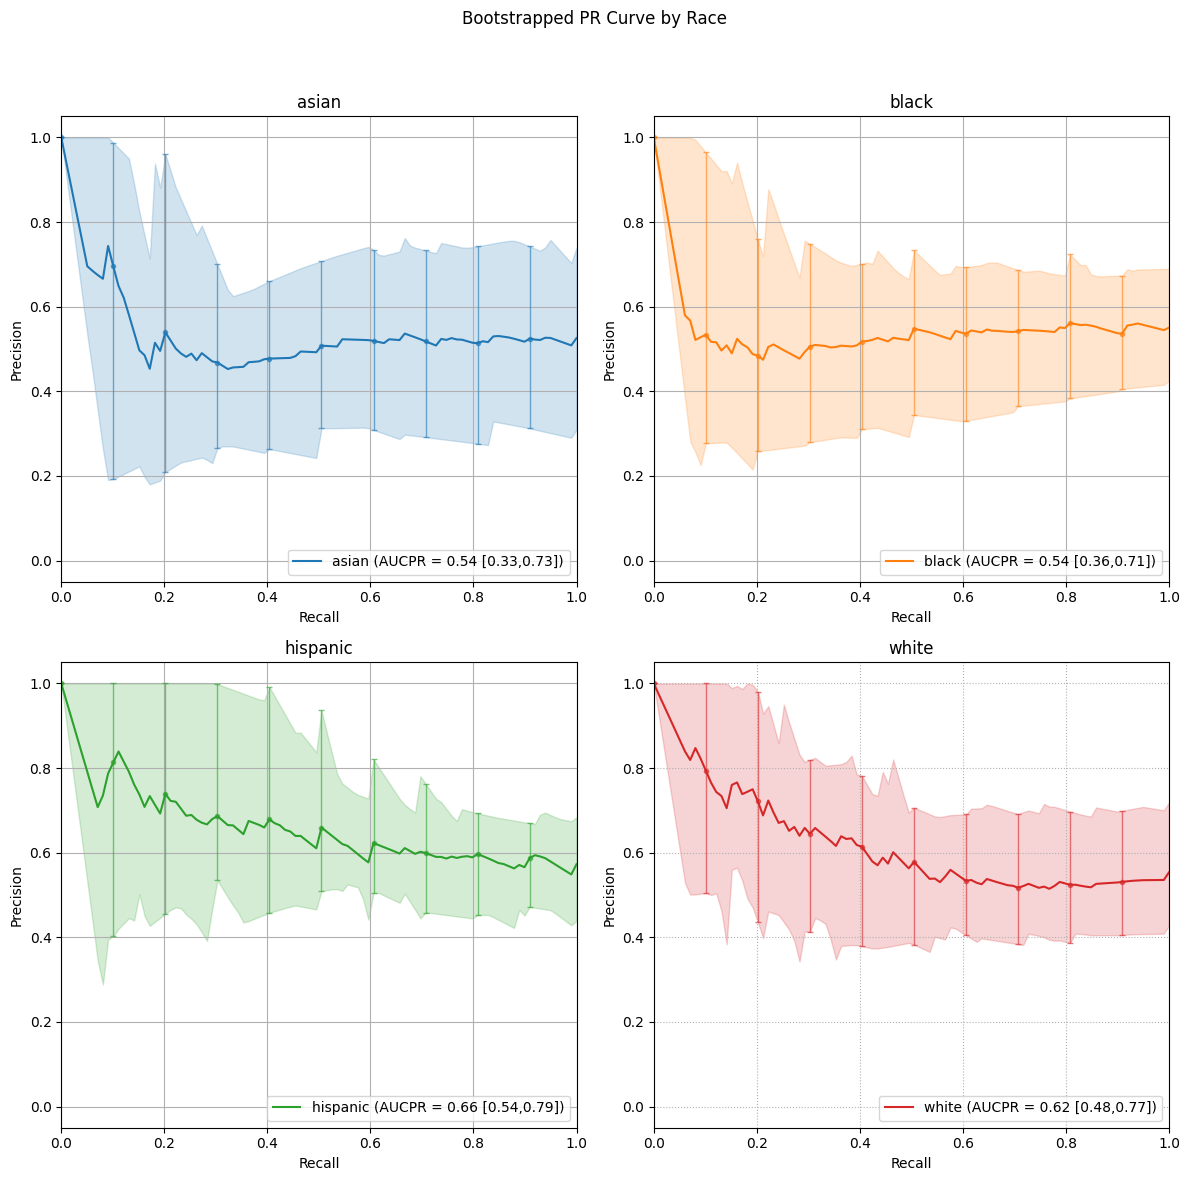

In [37]:
eqb.eq_plot_bootstrapped_group_curves(
    boot_sliced_data=boots_race_data,
    curve_type="pr",
    title="Bootstrapped PR Curve by Race",
    figsize=(6, 6),
    color_by_group=True,
    subplots=True,
    # exclude_groups=247,
)

### Calibration Plots Bootstrapped

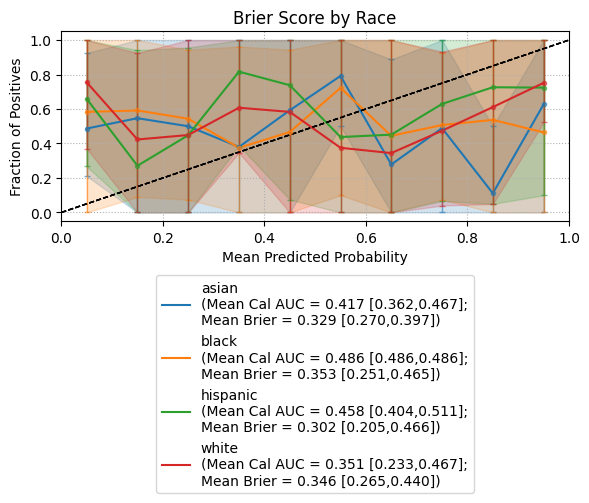

In [38]:
eqb.eq_plot_bootstrapped_group_curves(
    boot_sliced_data=boots_race_data,
    curve_type="calibration",
    title="Brier Score by Race",
    figsize=(6, 6),
    color_by_group=True,
)

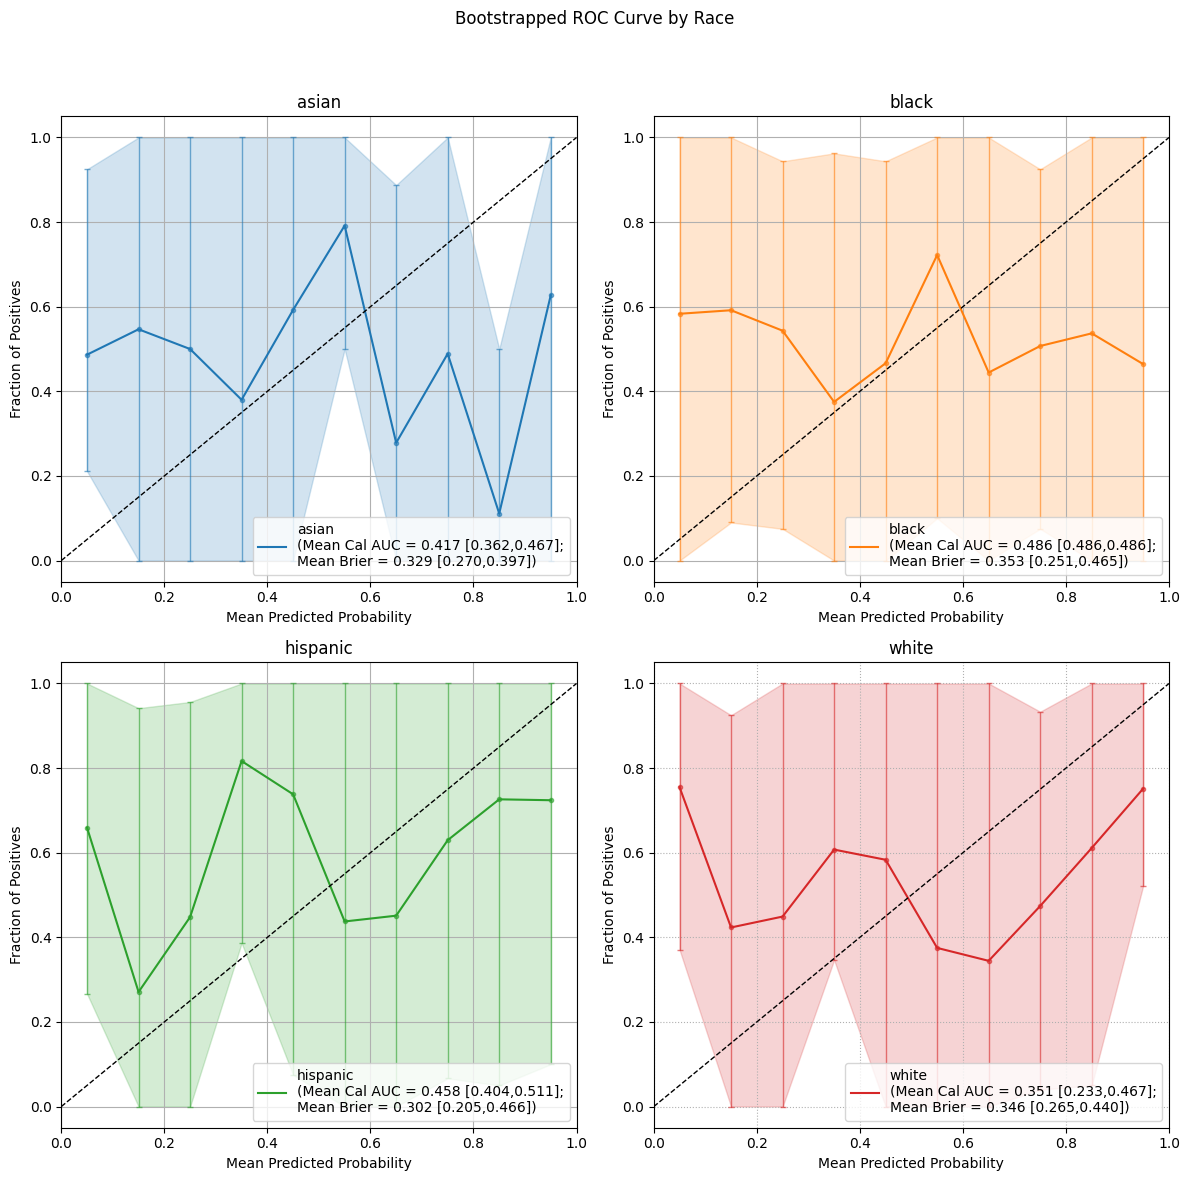

In [39]:
eqb.eq_plot_bootstrapped_group_curves(
    boot_sliced_data=boots_race_data,
    curve_type="calibration",
    title="Bootstrapped ROC Curve by Race",
    figsize=(6, 6),
    subplots=True,
    color_by_group=True,
)

## Bootstrapped Metrics Forest Plots

### ROC AUC

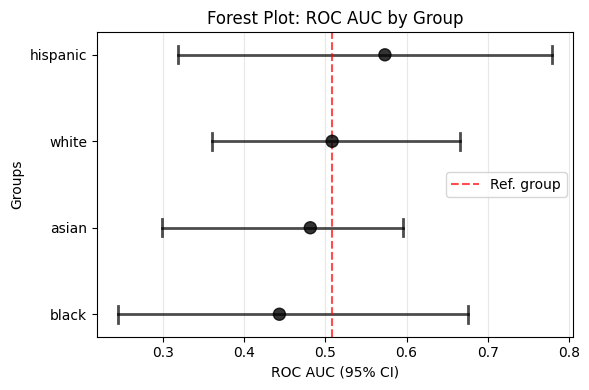

In [40]:
eqb.eq_plot_bootstrap_forest(
    group_boot_metrics=race_metrics,
    metric="ROC AUC",
    reference_group="white",
    save_path="images",
    filename="bootstrapped_roc_auc_calibration",
)

### Precision-Recall

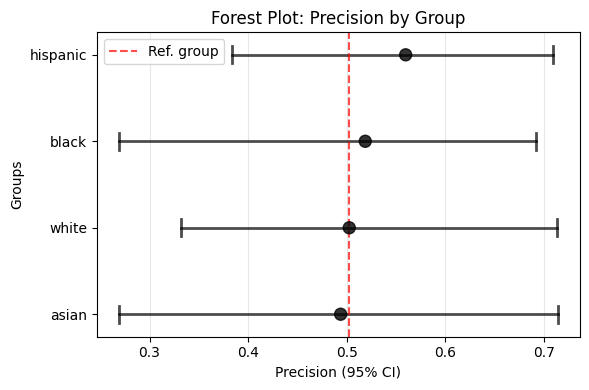

In [41]:
eqb.eq_plot_bootstrap_forest(
    group_boot_metrics=race_metrics,
    reference_group="white",
    metric="Precision",
    save_path="images",
    filename="bootstrapped_pr_auc_forest",
)

## Regression Mock-Up

In [42]:
## Generate synthetic regression-like data
np.random.seed(42)
y_true_reg = np.random.normal(loc=50, scale=10, size=1000)  ## continuous target
y_pred_reg = y_true_reg + np.random.normal(
    loc=0, scale=5, size=1000
)  # predicted value with noise

# Not really 'prob', but using this slot for predicted values
y_prob_reg = y_pred_reg

race = (
    np.random.RandomState(3)
    .choice(["white", "black", "asian", "hispanic"], 1000)
    .reshape(-1, 1)
)
sex = np.random.choice(["M", "F"], 1000).reshape(-1, 1)

fairness_df = pd.DataFrame(
    data=np.concatenate((race, sex), axis=1), columns=["race", "sex"]
)

# Initialize and process groups
eq3 = eqb.EquiBoots(
    y_true=y_true_reg,
    y_prob=y_prob_reg,
    y_pred=y_pred_reg,
    task="regression",
    fairness_df=fairness_df,
    fairness_vars=["race", "sex"],
)
eq3.grouper(groupings_vars=["race", "sex"])
sliced_data_2 = eq3.slicer("race")

Groups created


### Regression Residuals

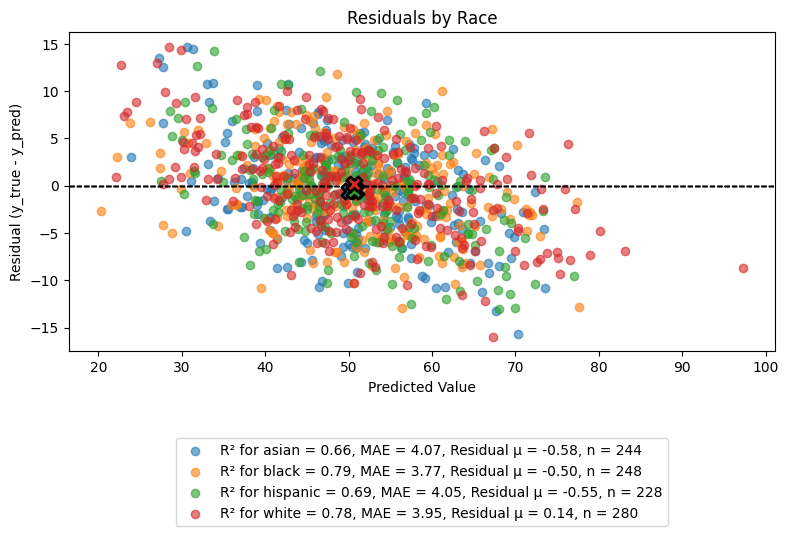

In [43]:
eqb.eq_plot_residuals_by_group(
    data=sliced_data_2,
    # y_true=y_true,
    # y_prob=y_pred,
    # group="black",
    title="Residuals by Race",
    filename="residuals_by_race",
    # subplots=True,
    # group="black",
    color_by_group=True,
    # n_cols=1,
    # n_rows=2,
    figsize=(8, 6),
    # group="black",
    show_centroids=True,
    save_path="./images",
    # exclude_groups="white",
    show_grid=False,
)

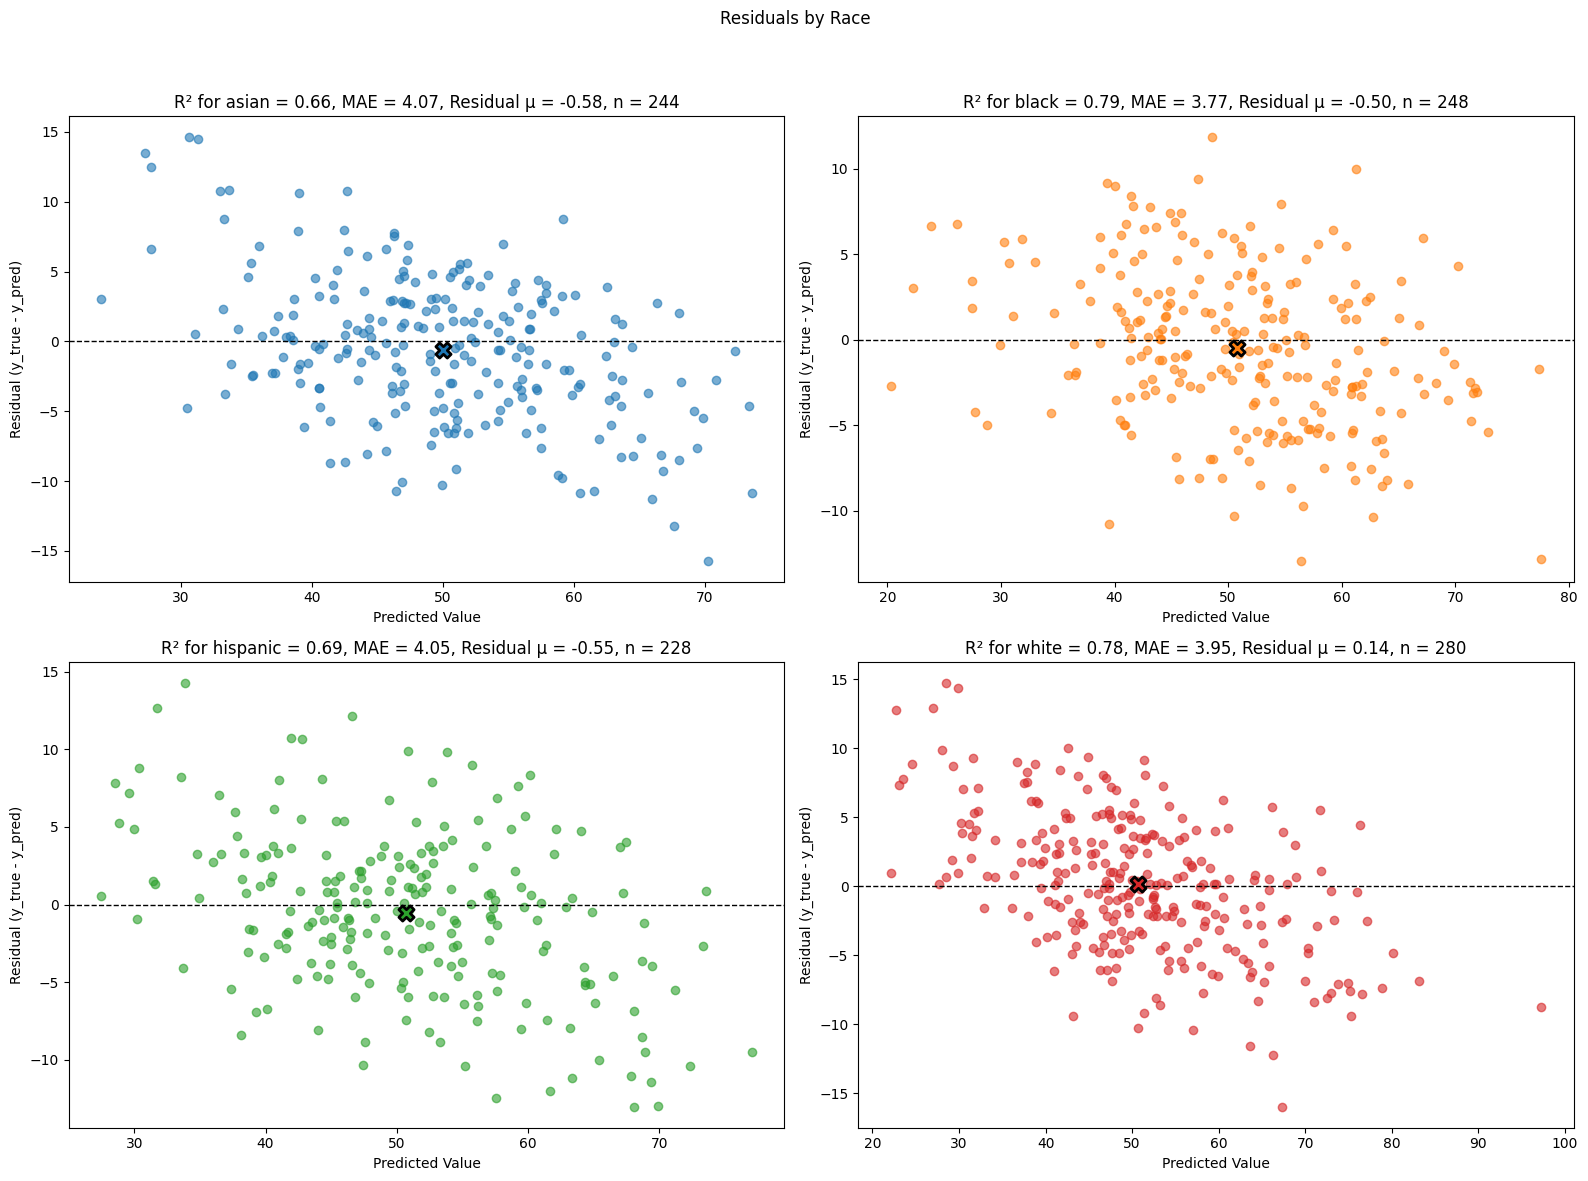

In [44]:
eqb.eq_plot_residuals_by_group(
    data=sliced_data_2,
    title="Residuals by Race",
    filename="residuals_by_race",
    subplots=True,
    # group="black",
    color_by_group=True,
    figsize=(8, 6),
    # group="black",
    show_centroids=True,
    save_path="./images",
    # exclude_groups="white",
    show_grid=False,
)